# Project: Wrangling and Analyze Data

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [115]:
df_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

In [117]:
df_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1246,711694788429553666,NaN,NaN,2016-03-20 23:23:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh. My. God. 13/10 magical af https://t.co/Ezu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In order to Download data through Requests, I have written the following code but it shows error due to restrictions on my work laptop, so I had to get dataframe using the tsv file provided. But I have written below the code (commented) that could have been used.

In [118]:
import requests
import io

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# r = requests.get(url)
# urlData = requests.get(url).content
# df_image_predictions = pd.read_table(io.StringIO(urlData.decode('utf-8')))

In [119]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [120]:
df_image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

As I did not want to create a twitter account, I chose to download the file available in Additional Data.

#### Code to get data using API

``` import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)


count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) ```

In [121]:
import json

data_json = []

with open('tweet_json.txt', "r") as file:
    for each_line in file:
        data_json.append(json.loads(each_line))
        
data_json[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [122]:
data_json_dict = {'tweet_id':[], 'retweet_count':[], 'favorite_count':[]}

for x in data_json:
    data_json_dict['tweet_id'].append(x['id_str'])
    data_json_dict['retweet_count'].append(x['retweet_count'])
    data_json_dict['favorite_count'].append(x['favorite_count'])
    
df_tweet_counts = pd.DataFrame.from_dict(data_json_dict)

In [123]:
df_tweet_counts.sample()

,tweet_id,retweet_count,favorite_count
454,818307523543449600,9366,0


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### First Dataframe

In [124]:
df_enhanced.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
683,788412144018661376,NaN,NaN,2016-10-18 16:11:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He breaks hearts for a living....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788412144...,11,10,Dexter,None,None,None,None


In [125]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [126]:
df_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [127]:
df_enhanced.tweet_id.nunique()

2356

In [128]:
df_enhanced.doggo.unique(), df_enhanced.floofer.unique(), df_enhanced.pupper.unique(), df_enhanced.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [129]:
df_enhanced.query('(doggo == "doggo") | (floofer == "floofer") | (pupper == "pupper") | (puppo == "puppo")').tweet_id.count()

380

In [130]:
df_enhanced.query('retweeted_status_id != "NaN"').head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [131]:
df_enhanced.query('in_reply_to_status_id != "NaN"').shape

(78, 17)

### Second Dataframe

In [132]:
df_image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False


In [133]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
df_image_predictions.tweet_id.nunique()

2075

In [135]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Third Dataframe

In [136]:
df_tweet_counts.sample(2)

,tweet_id,retweet_count,favorite_count
322,834089966724603904,2427,10971
91,874296783580663808,4308,26651


In [137]:
df_tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [138]:
df_tweet_counts.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues

1. Data type of timestamp is object. It should be in datetime format.

2. Since we do not need Retweeets, the rows with Non NaN values in 'retweeted_status_id' can be removed.

3. Since we do not need Replies, the rows with Non NaN values in 'in_reply_to_status_id' can be removed.

4. Create 2 columns, one with Best Dog Breed prediction and another one showing the confidence level in prediction. Get rid of the three prediction columns.

5. Columns like 'source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_timestamp' can be removed as well as they are not required for our further analysis.

6. During cleaning process, found that some dogs have been categorized in two categories. Rectify them based on text.

7.  tweet_id column should be an integer in df_tweet_counts instead of string. 

8. Remove the jpg url, text, img_num column from combined data.

## Tidiness issues

1. Create a single column for Categorization into doggo/floofer/pupper/puppo.

2. Create a single column which tells whether dog breed was predicted in any of the three predictions or not.

3. Combining all the dataframes into one to allow all information at one place.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [139]:
# Make copies of original pieces of data
df_enhanced_copy = df_enhanced.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_counts_copy = df_tweet_counts.copy()

### Issue #1: Data type of timestamp is object. It should be in datetime format.

#### Define: Convert the datatype of timestamp using to_datetime.

#### Code

In [140]:
df_enhanced_copy['timestamp']= pd.to_datetime(df_enhanced_copy['timestamp'])

#### Test

In [141]:
df_enhanced_copy.timestamp.dtype

datetime64[ns, UTC]

### Issue #2: Since we do not need Retweeets, the rows with Non NaN values in 'retweeted_status_id' can be removed.

#### Define : Using .query, we can get rid of rows with retweeted_status_id != NaN

#### Code

In [142]:
df_enhanced_copy.shape

(2356, 17)

In [143]:
df_enhanced_copy = df_enhanced_copy.query('retweeted_status_id == "NaN"')

#### Test

In [144]:
df_enhanced_copy.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [145]:
df_enhanced_copy.shape

(2175, 17)

### Issue #3:Since we do not need Replies, the rows with Non NaN values in 'in_reply_to_status_id' can be removed.

#### Define : Using .query, we can get rid of rows with in_reply_to_status_id != NaN

#### Code

In [146]:
df_enhanced_copy.shape

(2175, 17)

In [147]:
df_enhanced_copy = df_enhanced_copy.query('in_reply_to_status_id == "NaN"')

#### Test

In [148]:
df_enhanced_copy.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [149]:
df_enhanced_copy.shape

(2097, 17)

### Issue #4: Create a single column which tells whether dog breed was predicted in any of the three predictions or not.

#### Define: Using assign and np.where, create a column named 'dog_breed_predicted' and populate it using the conditions that apply for True and False outputs.

#### Code

In [150]:
df_image_predictions_copy.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie,0.665578,True,collie,0.176846,True,Old_English_sheepdog,0.065175,True


In [151]:
df_image_predictions_copy = (
    df_image_predictions_copy
    .assign(dog_breed_predicted = lambda d: np.where((d.p1_dog == False) & (d.p2_dog == False) & (d.p3_dog == False), False, True))
)

#### Test

In [152]:
df_image_predictions_copy.dog_breed_predicted.unique()

array([ True, False])

In [153]:
df_image_predictions_copy.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)').dog_breed_predicted.unique()

array([False])

### Issue #5: Create 2 columns, one with best dog breed prediction and another one showing the confidence level in prediction. Get rid of the three predictions' columns.

#### Define :  Using assign and np.where create the two columns:

1) 'best_pred_conf' - The highest confidence level value

2) 'best_pred_dog_breed'- Created according to best_pred_conf

#### Code

In [154]:
df_image_predictions_copy = (
    df_image_predictions_copy
    .assign(best_pred_conf = lambda d: np.where((d.p1_dog == True) & (d.p2_dog == False) & (d.p3_dog == False), d.p1_conf,
                                                np.where((d.p1_dog == False) & (d.p2_dog == True) & (d.p3_dog == False), d.p2_conf,
                                                         np.where((d.p1_dog == False) & (d.p2_dog == False) & (d.p3_dog == True), d.p3_conf,
                                                                  np.where((d.p1_dog == True) & (d.p2_dog == True) & (d.p3_dog == False), d.loc[:,["p1_conf", "p2_conf"]].max(1),
                                                                          np.where((d.p1_dog == False) & (d.p2_dog == True) & (d.p3_dog == True), d.loc[:,["p3_conf", "p2_conf"]].max(1),
                                                                                  np.where((d.p1_dog == True) & (d.p2_dog == False) & (d.p3_dog == True), d.loc[:,["p1_conf", "p3_conf"]].max(1),
                                                                                          d.loc[:,["p1_conf", "p2_conf", "p3_conf"]].max(1)
                                                                                          )))))))
    .assign(best_pred_dog_breed = lambda d: np.where(d.best_pred_conf == d.p1_conf, d.p1,
                                                    np.where(d.best_pred_conf == d.p2_conf, d.p2, d.p3
                                                            )))
    
    .drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])
    
)

#### Test

In [155]:
df_image_predictions_copy.sample()

,tweet_id,jpg_url,img_num,dog_breed_predicted,best_pred_conf,best_pred_dog_breed
1621,803276597545603072,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1,True,0.457086,Pembroke


### Issue#6: Columns like 'source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_timestamp' can be removed as well as they are not required for our further analysis.

#### Define : Drop columns listed above

#### Code

In [156]:
df_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [157]:
df_enhanced_copy = (
    df_enhanced_copy
    .drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'])    
)

#### Test

In [158]:
df_enhanced_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue#7 : Some dogs have been categorized in two categories. Rectify them based on text where possible.

#### Define : 

1) Find out the rows with multiple categories by 0,1 method.

2) Using assign rectify the rows with multiple categories.

In [159]:
df_enhanced_copy.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1178,719551379208073216,2016-04-11 15:43:12+00:00,This is Harnold. He accidentally opened the fr...,10,10,Harnold,None,None,None,None


In [160]:
df_enhanced_copy = (
    df_enhanced_copy
    
    .assign(doggo = lambda d: np.where(d.doggo == "None", 0, 1))
    .assign(floofer = lambda d: np.where(d.floofer == "None", 0, 1))
    .assign(pupper = lambda d: np.where(d.pupper == "None", 0, 1))
    .assign(puppo = lambda d: np.where(d.puppo == "None", 0, 1))
    
#     Using code lines below, the tweet_ids for correction were found out
#     .assign(dog_category_count = lambda d: d.doggo+d.floofer+d.pupper+d.puppo)
#     .query('dog_category_count >1')
    
    .assign(doggo = lambda d: np.where(d.tweet_id.isin([855851453814013952, 854010172552949760, 801115127852503040]), 0, d.doggo))
    .assign(pupper = lambda d: np.where(d.tweet_id.isin([785639753186217984]), 0, d.pupper))
)

#### Test

The ones which we are not sure about or contain multiple Dogs are left.

In [161]:
(
    df_enhanced_copy
    .assign(dog_category_count = lambda d: d.doggo+d.floofer+d.pupper+d.puppo)
    .query('dog_category_count >1')
    
)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_category_count
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13,10,Dido,1,0,1,0,2
531,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,1,0,1,0,2
733,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1,0,1,0,2
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,1,0,1,0,2
956,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,5,10,None,1,0,1,0,2
1063,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,12,10,just,1,0,1,0,2
1113,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12,10,None,1,0,1,0,2


### Issue#8: Create a single column for Categorization into doggo/floofer/pupper/puppo.

#### Define: 

1) Create a column 'dog_category' to categorize the dogs. For the ones with multiple dogs, the entry will consist both names.

2) Drop the columns : doggo, floofer, pupper, puppo

#### Code

In [162]:
df_enhanced_copy = (
    df_enhanced_copy
    .assign(dog_category_count = lambda d: d.doggo+d.floofer+d.pupper+d.puppo)
    .assign(dog_category = lambda d: np.where((d.dog_category_count == 1) & (d.doggo == 1), "doggo",
                                             np.where((d.dog_category_count == 1) & (d.floofer == 1), "floofer",
                                                     np.where((d.dog_category_count == 1) & (d.pupper == 1), "pupper",
                                                             np.where((d.dog_category_count == 1) & (d.puppo == 1), "puppo",
                                                                     np.where((d.dog_category_count == 2), "doggo , pupper",
                                                                              "None")
                                                                     )))))
    .drop(columns = ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category_count'])
    
    
)

#### Test

In [163]:
df_enhanced_copy.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_category
667,790337589677002753,2016-10-23 23:42:19+00:00,Meet Maggie. She can hear your cells divide. 1...,12,10,Maggie,None


### Issue#9 : tweet_id column should be an integer in df_tweet_counts instead of string.

#### Define: Using pd.to_numeric convert tweet_id data type from string to integer

#### Code

In [164]:
df_tweet_counts_copy["tweet_id"] = pd.to_numeric(df_tweet_counts_copy["tweet_id"])

#### Test

In [165]:
df_tweet_counts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #10: Combining all the dataframes into one to allow all information at one place.

#### Define: Merge the three dataframes one by one with inner merge.

#### Code

In [166]:
df_combine = (
    df_image_predictions_copy
    .merge(df_tweet_counts_copy, how = 'inner')
    .merge(df_enhanced_copy, how = 'inner')
    .reset_index(drop = True)

)

#### Test

In [167]:
df_combine.sample()

,tweet_id,jpg_url,img_num,dog_breed_predicted,best_pred_conf,best_pred_dog_breed,retweet_count,favorite_count,timestamp,text,rating_numerator,rating_denominator,name,dog_category
519,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,True,0.440916,Chihuahua,469,1536,2015-12-15 17:11:09+00:00,Say hello to Penny &amp; Gizmo. They are pract...,9,10,Penny,None


In [168]:
df_combine.shape

(1971, 14)

### Issue#11 : Remove the jpg url, text, img_num column from combined data.

#### Define

#### Code

In [169]:
df_master = (
    df_combine
    .drop(columns = ['jpg_url', 'text', 'img_num'])
)

#### Test

In [170]:
df_master.sample()

,tweet_id,dog_breed_predicted,best_pred_conf,best_pred_dog_breed,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_category
104,667866724293877760,False,1.0,jigsaw_puzzle,1110,3172,2015-11-21 00:46:50+00:00,10,10,Shaggy,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [171]:
df_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [172]:
df_master.sample()

,tweet_id,dog_breed_predicted,best_pred_conf,best_pred_dog_breed,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_category
1178,740699697422163968,False,0.878863,lawn_mower,888,3101,2016-06-09 00:19:04+00:00,8,10,Chip,None


<Figure size 432x288 with 0 Axes>

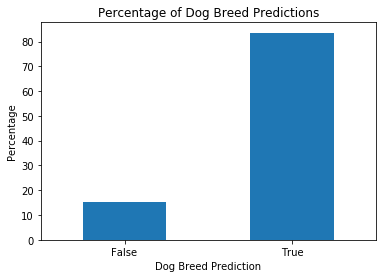

In [173]:
plt.figure()

df_master.groupby(['dog_breed_predicted'],
                  as_index = False).tweet_id.count().assign(PERCENT = lambda d: (d.tweet_id/1994)*100).plot(kind = 'bar',
                                                                                                            x = 'dog_breed_predicted', y = 'PERCENT', title = 'Percentage of Dog Breed Predictions',
                                                                                                            rot = 0, legend = False);

plt.xlabel('Dog Breed Prediction')
plt.ylabel('Percentage')
plt.show()

#### The plot above shows that 85% of the tweets did predict dog breeds atleast in one of the three predictions.

In [174]:
(
    df_master
    .query('dog_breed_predicted == True')

).describe()

,tweet_id,best_pred_conf,retweet_count,favorite_count,rating_numerator,rating_denominator
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,0.551571,2834.429772,9288.184274,11.388355,10.468788
std,6.801710e+16,0.298923,4831.960790,12641.538890,7.489081,6.343940
min,6.660209e+17,0.000010,16.000000,81.000000,0.000000,2.000000
25%,6.775503e+17,0.305955,650.500000,2176.000000,10.000000,10.000000
50%,7.141778e+17,0.550914,1440.500000,4464.000000,11.000000,10.000000
75%,7.931921e+17,0.822939,3261.000000,11734.750000,12.000000,10.000000
max,8.921774e+17,0.999956,79515.000000,132810.000000,165.000000,150.000000


#### Out of the Predicted Dog Breeds, the mean and median of prediction confidence lies around 0.55.

In [175]:
df_true_conf = (
    df_master
    .query('dog_breed_predicted == True')
    .assign(pred_conf_bucket = lambda d: np.where(d.best_pred_conf<=0.1, 0.1,
                                                 np.where((d.best_pred_conf<=0.2) & (d.best_pred_conf>0.1), 0.2,
                                                         np.where((d.best_pred_conf<=0.3) & (d.best_pred_conf>0.2), 0.3,
                                                                 np.where((d.best_pred_conf<=0.4) & (d.best_pred_conf>0.3), 0.4,
                                                                         np.where((d.best_pred_conf<=0.5) & (d.best_pred_conf>0.4), 0.5,
                                                                                 np.where((d.best_pred_conf<=0.6) & (d.best_pred_conf>0.5), 0.6,
                                                                                         np.where((d.best_pred_conf<=0.7) & (d.best_pred_conf>0.6), 0.7,
                                                                                                 np.where((d.best_pred_conf<=0.8) & (d.best_pred_conf>0.7), 0.8,
                                                                                                         np.where((d.best_pred_conf<=0.9) & (d.best_pred_conf>0.8), 0.9,1))))))))))
    .groupby(['pred_conf_bucket'], as_index = False).tweet_id.count()
    )

<Figure size 432x288 with 0 Axes>

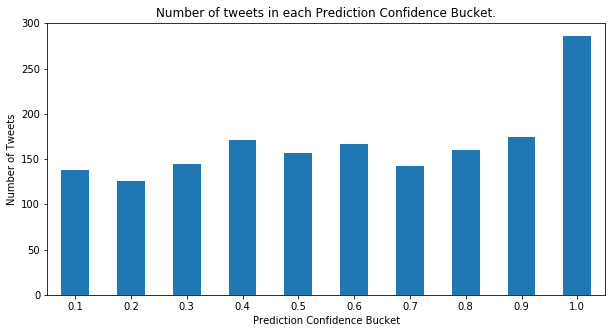

In [176]:
plt.figure()

df_true_conf.plot(kind = 'bar', x = 'pred_conf_bucket', y = 'tweet_id', figsize = (10,5), 
          xticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1], rot = 0,legend = False, title = 'Number of tweets in each Prediction Confidence Bucket.')

plt.xlabel('Prediction Confidence Bucket')
plt.ylabel('Number of Tweets')
plt.show()

In [177]:
(df_true_conf.query('pred_conf_bucket > 0.9').tweet_id.sum()/df_true_conf.tweet_id.sum())*100

17.16686674669868

   #### Insight 1: Only 17% of true dog breed predictions have confidence level >0.9 on their predictions.

<Figure size 432x288 with 0 Axes>

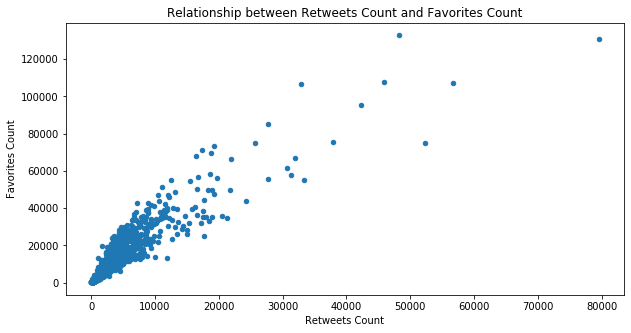

In [178]:
plt.figure()

df_master.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', figsize = (10,5), title = 'Relationship between Retweets Count and Favorites Count')

plt.xlabel('Retweets Count')
plt.ylabel('Favorites Count')
plt.show()

#### Insight 2: The scatter plot above shows the relationship between Retweet Count and the Favorite Count. More the retweets, more are the favorites.

In [179]:
(
    df_master
    .query('(dog_breed_predicted == True) & (best_pred_conf>0.9)')
    .groupby(['best_pred_dog_breed'], as_index = False)[['retweet_count', 'favorite_count']].sum()
    .merge(
        df_master
        .query('(dog_breed_predicted == True) & (best_pred_conf>0.9)')
        .groupby(['best_pred_dog_breed'], as_index = False)[['tweet_id']].count(), how = 'left'
    )
    .assign(retweet_count_per_tweet = lambda d: d.retweet_count/d.tweet_id)
    .assign(favorite_count_per_tweet = lambda d: d.favorite_count/d.tweet_id)
    .sort_values(by = ['retweet_count_per_tweet', 'favorite_count_per_tweet'], ascending = False)
    [['best_pred_dog_breed','retweet_count_per_tweet', 'favorite_count_per_tweet']]
    .reset_index(drop = True)    
).head(10)

,best_pred_dog_breed,retweet_count_per_tweet,favorite_count_per_tweet
0,Leonberg,7422.000000,29684.000000
1,Labrador_retriever,5661.235294,18646.470588
2,French_bulldog,5656.750000,21097.416667
3,Great_Pyrenees,5484.000000,24664.000000
4,Afghan_hound,5312.000000,17305.000000
5,Samoyed,5119.761905,14550.047619
6,Pembroke,4685.423077,16277.038462
7,Shetland_sheepdog,4571.750000,14774.000000
8,golden_retriever,3994.861111,13511.055556
9,vizsla,2904.000000,12780.500000


#### The data above shows top 10 Dog Breeds (prediction level > 0.9) which have the highest retweets count per tweet and favorites count per tweet.

#### Insight 3: The data from this exercise suggests that 'Leonberg' dog breed received the highest retweet and favorites per tweet followed by 'Labrador retriever'

In [180]:
(
    df_master
    .query('(dog_breed_predicted == True) & (best_pred_conf>0.9)')
    .query('(best_pred_dog_breed == "Leonberg") | (best_pred_dog_breed == "Labrador_retriever")')
    .sort_values(by = ['retweet_count', 'favorite_count'], ascending = False)
).head()

,tweet_id,dog_breed_predicted,best_pred_conf,best_pred_dog_breed,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,dog_category
1168,739544079319588864,True,0.967397,Labrador_retriever,24319,43694,2016-06-05 19:47:03+00:00,10,10,None,None
1708,830583320585068544,True,0.908703,Labrador_retriever,19297,73397,2017-02-12 01:04:29+00:00,13,10,Lilly,None
1779,844704788403113984,True,0.980213,Labrador_retriever,11633,42022,2017-03-23 00:18:10+00:00,13,10,Luna,None
1830,857746408056729600,True,0.919832,Labrador_retriever,11524,36021,2017-04-28 00:00:54+00:00,13,10,Thor,None
1758,839239871831150596,True,0.927021,Leonberg,7422,29684,2017-03-07 22:22:32+00:00,13,10,Odie,None


In [181]:
(
    df_image_predictions
    .pipe(lambda d: d[d.tweet_id.isin([739544079319588864, 839239871831150596])])
)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_Bernard,0.010728,True
